<a href="https://colab.research.google.com/github/MargaretZhou/MISA-Bootcamp-2021/blob/main/Santa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

import keras
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

#!pip install dask[bag] --upgrade
import dask.bag as bag
from dask import diagnostics

import os
from glob import glob

# Connect to Google Drive to access data

Note sure how else to access data besides using Google Drive. But you can upload data into drive, mount drive and access data from drive.

Already created a data folder called 432DeepLearning_SantaData. Link here:
https://drive.google.com/drive/u/0/folders/1N0cZ-UM4h124fx6l4SRpmOcKkfGlnmuA

In [ ]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


# Load Data

### For EDA

In [ ]:
train_dir = './drive/MyDrive/432DeepLearning_SantaData/is_that_santa/train' # train image folder
test_dir = './drive/MyDrive/432DeepLearning_SantaData/is_that_santa/test' # test image folder

# get the list of jpegs from sub image class folders
santa_train = [fn for fn in os.listdir(f'{train_dir}/santa') if fn.endswith('.jpg')]
nonsanta_train = [fn for fn in os.listdir(f'{train_dir}/not-a-santa') if fn.endswith('.jpg')]
santa_test = [fn for fn in os.listdir(f'{test_dir}/santa') if fn.endswith('.jpg')]
nonsanta_test = [fn for fn in os.listdir(f'{test_dir}/not-a-santa') if fn.endswith('.jpg')]

# Can load data later

### For modeling

Images are augmented

In [ ]:
train_generator = ImageDataGenerator(rescale = 1/255)
test_generator = ImageDataGenerator(rescale = 1/255)

In [ ]:
trainset = train_generator.flow_from_directory(r"./drive/MyDrive/432DeepLearning_SantaData/is_that_santa/train",target_size = (150,150),class_mode='binary',batch_size=80)
testset = test_generator.flow_from_directory(r"./drive/MyDrive/432DeepLearning_SantaData/is_that_santa/test",target_size = (150,150),class_mode = 'binary',batch_size= 20)

Found 614 images belonging to 2 classes.
Found 616 images belonging to 2 classes.


# EDA on train

Source: https://towardsdatascience.com/exploratory-data-analysis-ideas-for-image-classification-d3fc6bbfb2d2

### Train and test length for each class

Completely balanced

In [ ]:
# check the number of files in train
len(santa_train), len(nonsanta_train)

(307, 307)

In [ ]:
# check the number of files in test
len(santa_test), len(nonsanta_test)

(308, 308)

### Take a look at a few samples from santa and nonsanta class

Few priests in test set look awfully like santas

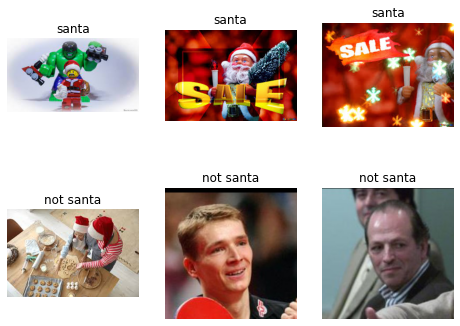

In [ ]:
# randomly select 3 of each
select_santa = np.random.choice(santa_train, 3, replace = False)
select_nonsanta = np.random.choice(nonsanta_train, 3, replace = False)

# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (8,6))
for i in range(6):
    if i < 3:
        fp = f'{train_dir}/santa/{select_santa[i]}'
        label = 'santa'
    else:
        fp = f'{train_dir}/not-a-santa/{select_nonsanta[i-3]}'
        label = 'not santa'
    ax = fig.add_subplot(2, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp)
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

### Checking image size

[                                        ] | 0% Completed |  0.0s./drive/MyDrive/432DeepLearning_SantaData/is_that_santa/train/santa/12.Santa.jpg
RGB
./drive/MyDrive/432DeepLearning_SantaData/is_that_santa/train/santa/317.Santa.jpg
RGB
(194, 259, 3)
./drive/MyDrive/432DeepLearning_SantaData/is_that_santa/train/santa/119.Santa.jpg
RGB
(275, 183, 3)
./drive/MyDrive/432DeepLearning_SantaData/is_that_santa/train/santa/180.Santa.jpg
[                                        ] | 0% Completed |  0.1sRGB
(1070, 1600, 3)
(175, 263, 3)
[                                        ] | 0% Completed |  0.2s./drive/MyDrive/432DeepLearning_SantaData/is_that_santa/train/santa/303.Santa.jpg
./drive/MyDrive/432DeepLearning_SantaData/is_that_santa/train/santa/10.Santa.jpg
[                                        ] | 0% Completed |  0.3sRGB
RGB
(265, 178, 3)
./drive/MyDrive/432DeepLearning_SantaData/is_that_santa/train/santa/249.Santa.jpg
RGB
(176, 263, 3)
./drive/MyDrive/432DeepLearning_SantaData/is_that_sant

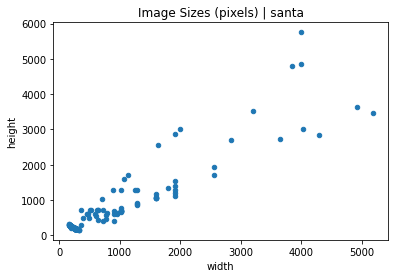

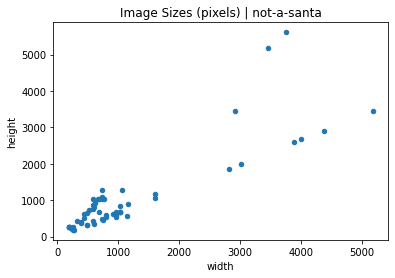

In [ ]:
directories = {'santa' : './drive/MyDrive/432DeepLearning_SantaData/is_that_santa/train/santa/',
               'not-a-santa' : './drive/MyDrive/432DeepLearning_SantaData/is_that_santa/train/not-a-santa/'}

def get_dims(file):
  '''Returns dimenstions for an RBG image'''
  im = Image.open(file)
  print(file)
  print(im.mode)
  data = np.array(im)
  #print(type(data))
  print(data.shape)

  # summarize shape
  #print(data.shape)
  # create Pillow image
  #image2 = Image.fromarray(data)
  #print(type(image2))

  # summarize image details
  #print(image2.mode)
  #print(image2.size)
  arr = np.array(im)
  #h,w,d = arr.shape
  h = arr.shape[0]
  w = arr.shape[1]
  return h,w

for n,d in directories.items():
  filepath = d
  filelist = [filepath + f for f in os.listdir(filepath)]
  dims = bag.from_sequence(filelist).map(get_dims)
  with diagnostics.ProgressBar():
    dims = dims.compute()
    dim_df = pd.DataFrame(dims, columns=['height', 'width'])
    sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
    sizes.plot.scatter(x='width', y='height');
    plt.title('Image Sizes (pixels) | {}'.format(n))

### Turn images into matrix based on pixels (numpy array)

In [ ]:
# making n X m matrix
def img2np(path, list_of_filename, size = (100, 100)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size)
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

# run it on our folders
santa_pixels_train = img2np(f'{train_dir}/santa/', santa_train)
nonsanta_pixels_train = img2np(f'{train_dir}/not-a-santa/', nonsanta_train)

### Get image average

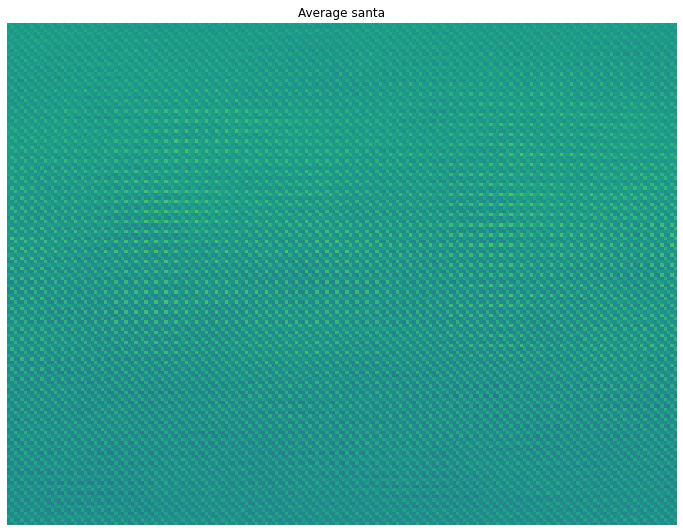

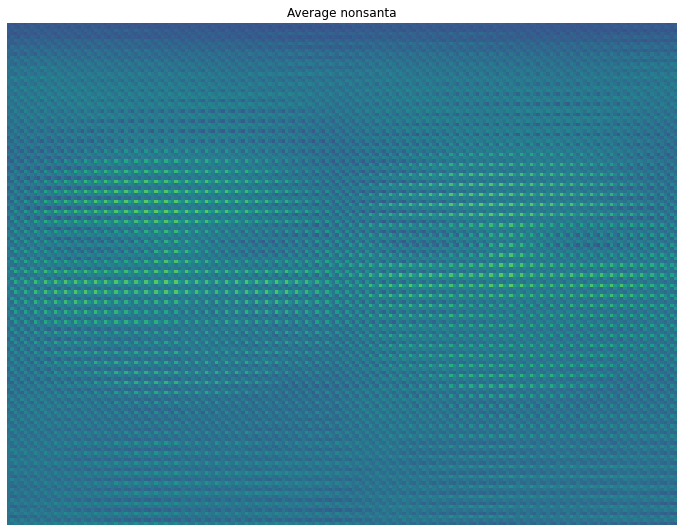

In [ ]:

def find_mean_img(full_mat, title, size = (150, 200)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

santa_mean = find_mean_img(santa_pixels_train, 'santa')
nonsanta_mean = find_mean_img(nonsanta_pixels_train, 'nonsanta')

### Contrast between images

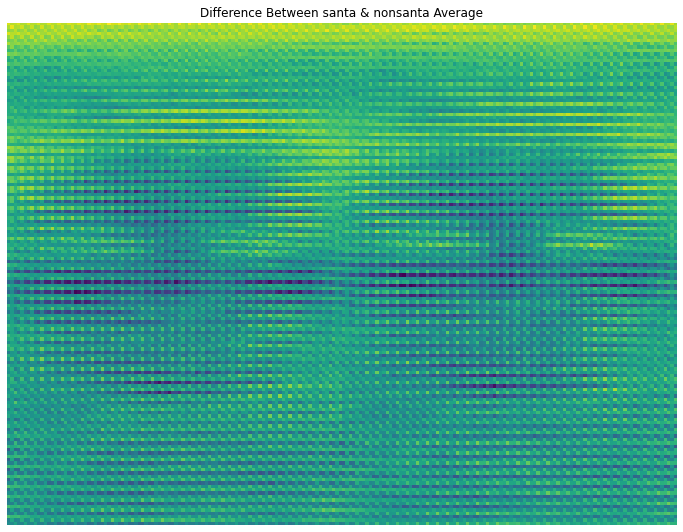

In [ ]:
contrast_mean = santa_mean - nonsanta_mean
plt.imshow(contrast_mean)
plt.title(f'Difference Between santa & nonsanta Average')
plt.axis('off')
plt.show()

### Variability

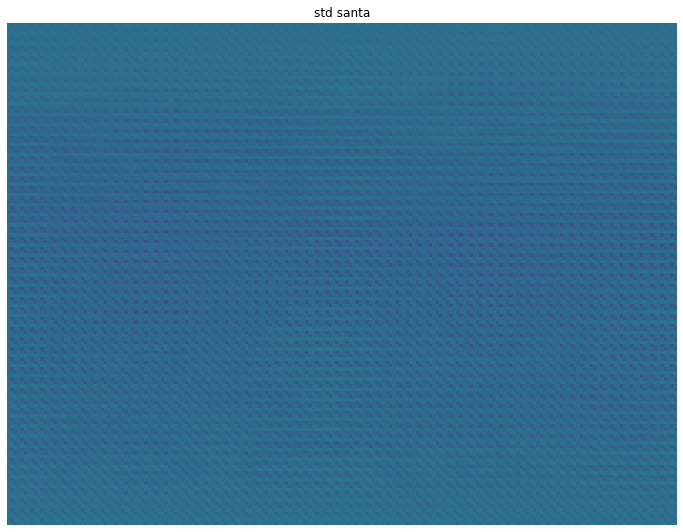

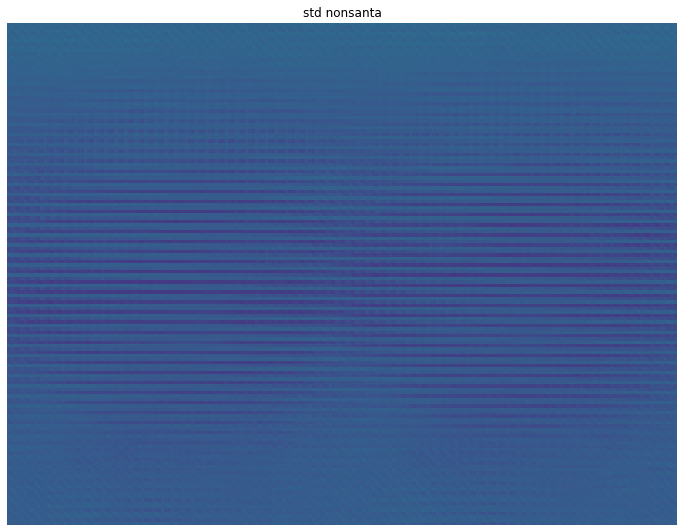

In [ ]:

def find_std_img(full_mat, title, size = (150, 200)):
    # calculate the average
    std_img = np.std(full_mat, axis = 0)
    # reshape it back to a matrix
    std_img = std_img.reshape(size)
    plt.imshow(std_img, vmin=0, vmax=255)
    plt.title(f'std {title}')
    plt.axis('off')
    plt.show()
    return std_img

santa_mean = find_std_img(santa_pixels_train, 'santa')
nonsanta_mean = find_std_img(nonsanta_pixels_train, 'nonsanta')

**bold text** # Style-Transfer

Use colors from Santa image - 269.Santa and 285.Santa (animated) - Style test set

Content transfer image - 234.not-a-santa --- test set

In [ ]:
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

In [ ]:
train_dir = './drive/MyDrive/432DeepLearning_SantaData/is_that_santa/train' # train image folder
test_dir = './drive/MyDrive/432DeepLearning_SantaData/is_that_santa/test' # test image folder

# get the list of jpegs from sub image class folders
santa_train = [fn for fn in os.listdir(f'{train_dir}/santa') if fn.endswith('.jpg')]
nonsanta_train = [fn for fn in os.listdir(f'{train_dir}/not-a-santa') if fn.endswith('.jpg')]
santa_test = [fn for fn in os.listdir(f'{test_dir}/santa') if fn.endswith('.jpg')]
nonsanta_test = [fn for fn in os.listdir(f'{test_dir}/not-a-santa') if fn.endswith('.jpg')]

# Can load data later

In [ ]:
santa_train[0]

'12.Santa.jpg'

In [ ]:
fp = f'{train_dir}/santa/{1}'

./drive/MyDrive/432DeepLearning_SantaData/is_that_santa/train/santa/571.Santa.jpg
./drive/MyDrive/432DeepLearning_SantaData/is_that_santa/train/santa/374.Santa.jpg
./drive/MyDrive/432DeepLearning_SantaData/is_that_santa/train/santa/50.Santa.jpg


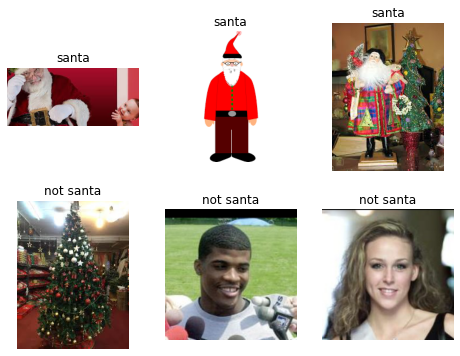

In [ ]:
# randomly select 3 of each
select_santa = np.random.choice(santa_train, 3, replace = False)
select_nonsanta = np.random.choice(nonsanta_train, 3, replace = False)

# plotting 2 x 3 image matrix
fig = plt.figure(figsize = (8,6))
for i in range(6):
    if i < 3:
        fp = f'{train_dir}/santa/{select_santa[i]}'
        print(fp)
        label = 'santa'
    else:
        fp = f'{train_dir}/not-a-santa/{select_nonsanta[i-3]}'
        label = 'not santa'
    ax = fig.add_subplot(2, 3, i+1)
    
    # to plot without rescaling, remove target_size
    fn = image.load_img(fp)
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

In [ ]:

from tensorflow.keras import backend
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


NameError: ignored

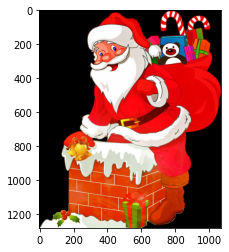

In [ ]:
fp = f'{test_dir}/santa/{"285.Santa.jpg"}'
fn = image.load_img(fp)
plt.imshow(fn, cmap='Greys_r')
plt.title(label)
plt.axis('off')
plt.show()

In [ ]:
# sourcing style image
#269.Santa
#285.Santa
style_image_dir = f'{test_dir}/santa/{"269.Santa.jpg"}'
style_image = Image.open(style_image_dir).resize((512,512))

# sourcing transfer image
transfer_image_dir = f'{test_dir}/not-a-santa/{"340.not-a-santa.jpg"}'
transfer_image = Image.open(transfer_image_dir).resize((512,512))


In [ ]:
content_array = np.asarray(transfer_image, "float32")
content_array = np.expand_dims(content_array, axis = 0)
content_array_cp = np.copy(content_array)

style_array = np.asarray(style_image, "float32")
style_array = np.expand_dims(style_array, axis = 0)
style_array_cp = np.copy(style_array)

content_array_cp[:,:,:,0] -= 103.939
content_array_cp[:,:,:,1] -= 116.779
content_array_cp[:,:,:,2] -= 123.68

style_array_cp[:,:,:,0] -= 103.939
style_array_cp[:,:,:,1] -= 116.779
style_array_cp[:,:,:,2] -= 123.68

content_array_cp = content_array_cp[:,:,:, ::-1]
style_array_cp = style_array_cp[:,:,:, ::-1]

In [ ]:
style_array_cp.shape

(1, 512, 512, 3)

In [ ]:
content_variable = backend.variable(content_array_cp)
style_variable = backend.variable(style_array_cp)

# placeholder creates an empty tensor with the shape
combination_variable = backend.placeholder(shape = content_array_cp.shape)

# tensor variable to be input for the deep learning model
tensor_variable = backend.concatenate([ content_variable, style_variable, combination_variable], axis = 0)

  <tf.Variable 'Variable:0' shape=(1, 512, 512, 3) dtype=float32>. This is a strong indication that the Lambda layer should be rewritten as a subclassed Layer.


  <tf.Variable 'Variable:0' shape=(1, 512, 512, 3) dtype=float32>. This is a strong indication that the Lambda layer should be rewritten as a subclassed Layer.


In [ ]:
combination_variable.shape, style_variable.shape, content_variable.shape
tensor_variable

<KerasTensor: shape=(3, 512, 512, 3) dtype=float32 (created by layer 'tf.concat_6')>

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

vgg_model = VGG16(input_tensor = tensor_variable, weights = "imagenet", include_top = False)

# see all the layers in the model excluding the fully connected layers
vgg_model.layers

# Create a dictionary so we can call the layer by its layer name  
layers  = dict([(layer.name, layer.output) for layer in vgg_model.layers])

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
def calculate_content_loss(content, combination):
    return backend.sum(backend.square(content - combination))
    
layer_features = layers["block2_conv2"]
print(layer_features)
content_image_features = layer_features[0,:,:,:]
combination_image_features = layer_features[2,:,:,:]
print(content_image_features)

KerasTensor(type_spec=TensorSpec(shape=(3, 256, 256, 128), dtype=tf.float32, name=None), name='block2_conv2/Relu:0', description="created by layer 'block2_conv2'")
KerasTensor(type_spec=TensorSpec(shape=(256, 256, 128), dtype=tf.float32, name=None), name='tf.__operators__.getitem/strided_slice:0', description="created by layer 'tf.__operators__.getitem'")


In [ ]:
def calculate_gram_matrix(matrix):
    features = backend.batch_flatten(backend.permute_dimensions(matrix, (2, 0, 1)))
    return backend.dot(features, backend.transpose(features))

def calculate_style_loss(style, combination):
    style_gram = calculate_gram_matrix(style)
    combination_gram = calculate_gram_matrix(combination)
    channels = 3
    size = 512 * 512 ## height * width
    return backend.sum(backend.square(style_gram - combination_gram)) / (4. * (channels **2) * (size ** 2))

feature_layers = ["block1_conv2", "block2_conv2", "block3_conv3", "block4_conv3", "block5_conv3"]

In [ ]:
content_weight = 0.025
style_weight = 2.5
total_variation_weight = 1

In [ ]:
loss = backend.variable(0.)

# Add content loss with block2_conv2
layer_features = layers["block2_conv2"]
content_image_features = layer_features[0,:,:,:]
combination_image_features = layer_features[2,:,:,:]
loss = loss + (content_weight * calculate_content_loss(content_image_features, combination_image_features))

# Add style loss
feature_layers = ["block1_conv2", "block2_conv2", "block3_conv3", "block4_conv3", "block5_conv3"]

for i in feature_layers:
    layer_features = layers[i]
    style_image_features = layer_features[1,:,:,:]
    combination_image_features = layer_features[2,:,:,:]
    style_loss = calculate_style_loss(style_image_features, combination_image_features)
    loss = loss + (style_weight/ len(feature_layers))*style_loss
		
# Add total variation loss
def total_variation_loss(tensor):
    a = backend.square(tensor[:, :511, :511, :] - tensor[:, 1:, :511, :])
    b = backend.square(tensor[:, :511, :511, :] - tensor[:, :511, 1:, :])
    return backend.sum(backend.pow(a+b, 1.25))
loss= loss + total_variation_weight*total_variation_loss(combination_variable)


In [ ]:
tf.compat.v1.disable_eager_execution()
grads = backend.gradients(loss, combination_variable)

output = [loss]

if type(grads) in {tuple, list}:
    output+=grads
else:
    output.append(grads)
    
f_outputs = backend.function([combination_variable], output)

https://stackoverflow.com/questions/58271820/how-to-replace-keras-gradients-function-with-gradienttape-in-tf2-0 

TypeError: ignored

In [ ]:
f_outputs = backend.function([combination_variable], output)

NameError: ignored

In [ ]:
def eval_loss_and_grads(tensor):
    tensor = tensor.reshape((1, 512, 512, 3))
    outs = f_outputs([tensor])
    loss_value = outs[0]
    if len(outs[1:]) == 1:
        grad_values  = outs[1].flatten().astype("float64")
    else:
        grad_values  = np.array(outs[1:]).flatten().astype("float64")
    return loss_value, grad_values
class Evaluator:
    
    def __init__(self):
        self.loss_value = None
        self.grad_values = None
        
    def loss(self ,x):
        assert self.loss_value is None
        self.loss_value, self.grad_values = eval_loss_and_grads(x)
        return self.loss_value
    def grads(self, x):
        assert self.loss_value is not None
        grad_values = np.copy(self.grad_values)
        self.loss_value = None
        self.grad_values = None
        return grad_values
evaluator = Evaluator()

In [ ]:
import time
from scipy.optimize import fmin_l_bfgs_b

x = np.random.uniform(0, 255, (1, 512, 512, 3)) - 128.

iterations = 10

for i in range(iterations):
    print("iternation #", i)
    start = time.time()
    x, min_val, info = fmin_l_bfgs_b(evaluator.loss, x.flatten(), fprime = evaluator.grads, maxfun = 30)
    print("current_loss", min_val)
    end = time.time()
    print("iteration completed in ", end - start)

iternation # 0


NameError: ignored

In [ ]:
x = x.reshape((512,512,3))
x = x[:,:,::-1]
x[:,:,0]+=103.939
x[:,:,1]+= 116.779
x[:,:,2]+= 123.68
x = np.clip(x, 0, 255).astype("uint8")

Image.fromarray(x)

**bold text**